## Libraries

In [24]:
# Core
import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]

import graphviz
import seaborn as sns


# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

from sklearn.utils import resample

## Data

In [25]:
## Dataset

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [26]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
df.shape

(299, 13)

In [30]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data cleaning

In [32]:
## First, reordering to begin with our response variable.

cols_to_order = ['DEATH_EVENT']
new_columns = cols_to_order + (df.columns.drop(cols_to_order).tolist())
df = df[new_columns]
df.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,1,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,1,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,1,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [33]:
## Second, modifyng the name of our response variable.

df.rename(columns = {'DEATH_EVENT':'death_event'}, inplace = True)
df.head()

,death_event,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,1,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,1,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,1,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [36]:
## Third, lets check any missing variables.

total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
     [total, percent],
      axis=1,
      keys=['Total', 'Percent'])
      
missing_data.head(20)

## No missing variables.

,Total,Percent
death_event,0,0.0
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0


In [39]:
## Fourth, lets check duplicated values.

df.duplicated().sum()

## No duplicated values as well.

0

## Data exploration

In [42]:
#correlation matrix

corr_matrix = df.corr().sort_values(
    by = "death_event",  ascending=False, key = abs)
corr_matrix

,death_event,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
death_event,1.000000,0.253729,0.066270,0.062728,-0.001943,-0.268603,0.079351,-0.049139,0.294278,-0.195204,-0.004316,-0.012623,-0.526964
time,-0.526964,-0.224068,-0.141414,-0.009346,0.033726,0.041729,-0.196439,0.010514,-0.149315,0.087640,-0.015608,-0.022839,1.000000
serum_creatinine,0.294278,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315
ejection_fraction,-0.268603,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729
age,0.253729,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068
serum_sodium,-0.195204,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640
high_blood_pressure,0.079351,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439
anaemia,0.066270,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414
creatinine_phosphokinase,0.062728,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346
platelets,-0.049139,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514


<AxesSubplot:>

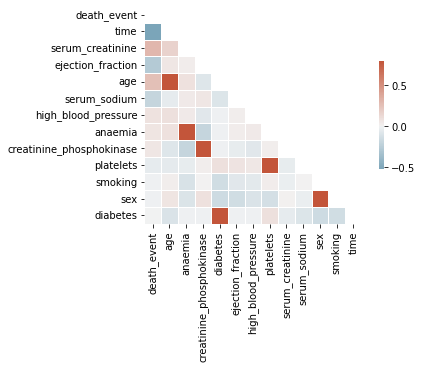

In [43]:
#sns.heatmap(corrmat, vmax=.8, square=True);

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax = 0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})